In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


调整数据，将表格中的Class 替换为`reptile` and `not-a-reptile`的二元分类

In [2]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','mammals'],'non-reptiles')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,non-reptiles
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,non-reptiles
3,whale,1,1,1,0,0,0,non-reptiles
4,frog,0,0,1,0,1,1,non-reptiles
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,non-reptiles
7,pigeon,1,0,0,1,1,0,non-reptiles
8,cat,1,1,0,0,1,0,non-reptiles
9,leopard shark,0,1,1,0,0,0,non-reptiles


In [3]:
pd.crosstab([data['Aquatic Creature'],data['Gives Birth']],data['Class'])

Class                         non-reptiles  reptiles
Aquatic Creature Gives Birth                        
0                0                       1         2
                 1                       4         0
1                0                       5         1
                 1                       2         0

In [4]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X, Y)

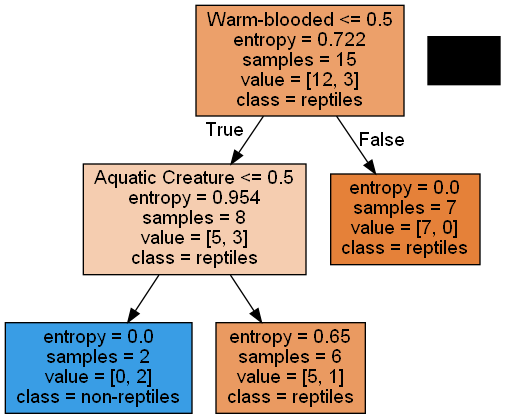

In [9]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['reptiles','non-reptiles'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
testData = [['gila monster',0,0,0,0,1,1,'reptiles'],
            ['platypus',1,0,0,0,1,1,'non-reptiles'],
            ['owl',1,0,0,1,1,0,'non-reptiles'],
            ['dolphin',1,1,1,0,0,0,'non-reptiles']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,reptiles
1,platypus,1,0,0,0,1,1,non-reptiles
2,owl,1,0,0,1,1,0,non-reptiles
3,dolphin,1,1,1,0,0,0,non-reptiles


In [11]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,non-reptiles
2,owl,non-reptiles
3,dolphin,non-reptiles


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


最大深度无限制的情况 重复实验

In [13]:
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf_noLimit = tree.DecisionTreeClassifier(criterion='entropy')
clf_noLimit = clf_noLimit.fit(X, Y)

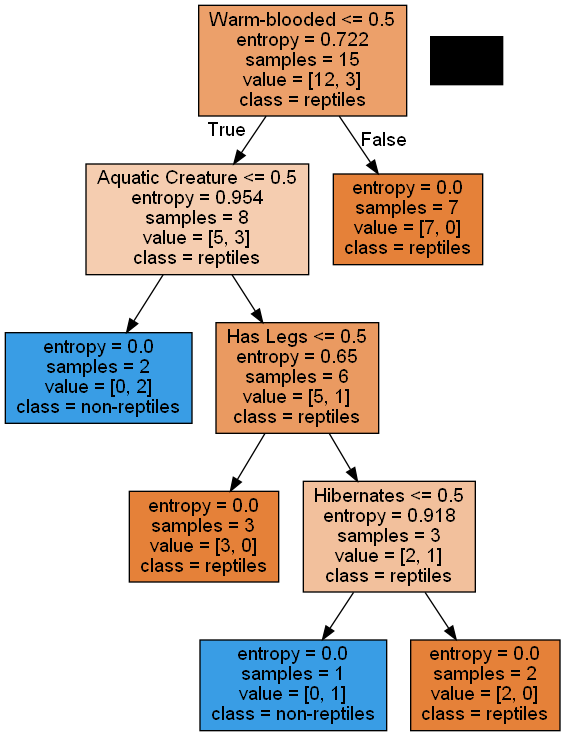

In [14]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf_noLimit, feature_names=X.columns, class_names=['reptiles','non-reptiles'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [15]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,reptiles
1,platypus,non-reptiles
2,owl,non-reptiles
3,dolphin,non-reptiles


In [16]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
9,0,1,1,0,0,0
8,1,1,0,0,1,0
3,1,1,1,0,0,0
6,1,1,0,1,1,1
1,0,0,0,0,0,1
13,0,0,1,0,0,0
2,0,0,1,0,0,0
7,1,0,0,1,1,0
4,0,0,1,0,1,1
14,0,0,1,0,1,1


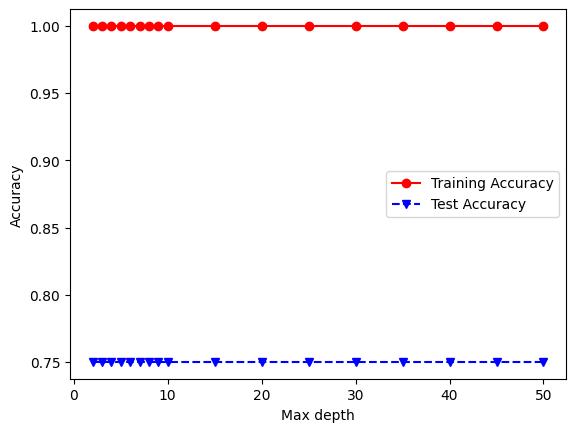

In [22]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
testData = [['gila monster',0,0,0,0,1,1,'reptiles'],
            ['platypus',1,0,0,0,1,1,'non-reptiles'],
            ['owl',1,0,0,1,1,0,'non-reptiles'],
            ['dolphin',1,1,1,0,0,0,'non-reptiles']]
testData = pd.DataFrame(testData, columns=data.columns)

concatData = pd.concat([data,testData])

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25 , random_state=30)

from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

X_train